## Getting Chat Generated Articles from OpenAI

In [62]:
#%pip install --user openai

In [63]:
import openai
import pandas as pd
import numpy as np
import time

# Set api key here, left empty for account privacy reasons. You can add you own api key if you want to try
openai.api_key = ""

In [64]:
# with open("C:\\Users\\graduate\\Box\\Courses taken\\CS 6830 Data Science in practice\\Final project\\openai_api.txt", 'r') as f:
#     api_key = f.read().strip()

# # Set api key here, left empty for account privacy reasons. You can add you own api key if you want to try
# openai.api_key = api_key

In [65]:
# articles is a list of dictionaries. Each dictionary contains all the information needed to generate one news article.
# Information is gotten by scraping existing articles online
# Currently, the prompt requires the the new organization: 'source', wordcount the generated article should be: 'wordcount'
# and the headline: 'headline'. An example is shown below
articles = [{'source':'CNN', 'wordcount':'200', 'headline':'What is the Good Friday Agreement? How a historic deal ended the Troubles in Northern Ireland'}]

In [66]:
def getFakeArticles(articles):
    fakeArticles = pd.DataFrame(columns=['Headline', 'Content'])
    for article in articles:
        prompt=[
            {"role": "system", "content": f"You are a journalist at {article['source']}"},
            {"role": "user", "content": f"Write an article with about {article['wordcount']} words with the headline '{article['headline']}'"},
        ]
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=prompt
        )
        fakeArticles.loc[len(fakeArticles.index)] = [article['headline'], response['choices'][0]['message']['content']]
        print(f'Articles created: {len(fakeArticles)}')

        time.sleep(5)

    return fakeArticles

## Make CNN Fake Articles

In [67]:
# df = pd.read_csv('CNN500_items.csv')

# ai_50 = df.sample(frac = 0.5)
# real_50 = df.drop(ai_50.index)

# articles = []
# for index, row in ai_50.iterrows():
#     articles.append({'source':'CNN','wordcount':len(row.Description.replace('\n','').split(' ')),'headline':row.Title.replace('\n','').strip()})

In [68]:
# ai_gen = getFakeArticles(articles)

In [69]:
# ai_gen.columns = ['Title', 'Content']
# ai_gen['Source'] = 1

# non_ai = real_50[['Title', 'Description']]
# non_ai.columns = ['Title', 'Content']
# non_ai['Source'] = 0

# cnn_mixed = pd.concat([ai_gen, non_ai], ignore_index=True)

In [70]:
# cnn_mixed.to_csv(path_or_buf="cnn_mixed.csv")

## Make AP Fake Articles

In [71]:
# df = pd.read_csv('AP501dataset.csv')

# df.loc[0].text
# ai_50 = df.sample(frac = 0.5)
# real_50 = df.drop(ai_50.index)

# articles = []
# for index, row in ai_50.iterrows():
#     articles.append({'source':'AP News','wordcount':len(row.text.replace('\n','').split(' ')),'headline':row.title.replace('\n','').strip()})

In [72]:
# ai_gen = getFakeArticles(articles)

In [73]:
# ai_gen.columns = ['Title', 'Content']
# ai_gen['Source'] = 1

# non_ai = real_50[['title', 'text']]
# non_ai.columns = ['Title', 'Content']
# non_ai['Source'] = 0

# ap_mixed = pd.concat([ai_gen, non_ai], ignore_index=True)

In [74]:
# ap_mixed.to_csv("ap_mixed.csv")

## Make Fake Fox News Articles

In [75]:
# df = pd.read_csv('fox260.csv')

# ai_50 = df.sample(frac = 0.5)
# real_50 = df.drop(ai_50.index)

# articles = []
# for index, row in ai_50.iterrows():
#     articles.append({'source':'Fox News','wordcount':len(row.text.replace('\n','').split(' ')),'headline':row.title.replace('\n','').strip()})

In [76]:
# ai_gen = getFakeArticles(articles)

In [77]:
# ai_gen.columns = ['Title', 'Content']
# ai_gen['Source'] = 1

# non_ai = real_50[['title', 'text']]
# non_ai.columns = ['Title', 'Content']
# non_ai['Source'] = 0

# fox_mixed = pd.concat([ai_gen, non_ai], ignore_index=True)

In [78]:
# fox_mixed.to_csv("fox_mixed.csv")

## Megh's Analysis

#### Read dataset

In [79]:
import pandas as pd
import numpy as np

In [80]:
# Read the three CSV files into separate DataFrames
ap_mixed1 = pd.read_csv('ap_mixed.csv')
display(ap_mixed1)

,Unnamed: 0,Title,Content,Source
0,0,Silicon Valley Bank collapse concerns founders...,"The collapse of Silicon Valley Bank, a major f...",1
1,1,Mother of young boy who shot teacher arrested ...,"In a shocking turn of events, the mother of th...",1
2,2,660-mile rescue flight highlights Alaska's uni...,"ANCHORAGE, Alaska (AP) — A recent rescue missi...",1
3,3,"Suspect in leak probe talked about God, guns a...",WASHINGTON (AP) -- A former U.S. government em...,1
4,4,New Ram electric pickup can go up to 500 miles...,The Ram truck brand has been a dominant force ...,1
...,...,...,...,...
496,496,When exactly will India surpass China as most ...,India will surpass China’s population this mon...,0
497,497,"India residents try to save a river, officials...","KOCHI, India (AP) — Eloor smells like it is dy...",0
498,498,Dutch court nixes plan to reduce flights at Sc...,"THE HAGUE, Netherlands (AP) — A judge ruled We...",0
499,499,Easter marks Las Vegas' warmest day yet in 2023,LAS VEGAS (AP) — Easter Sunday marks the first...,0


In [81]:
cnn_mixed1 = pd.read_csv('cnn_mixed.csv')
display(cnn_mixed1)

,Unnamed: 0,Title,Content,Source
0,0,Prince Harry to attend King's coronation witho...,Prince Harry is set to attend his grandfather'...,1
1,1,Tupperware stock plunges after warning it coul...,"Tupperware, the company famous for its airtigh...",1
2,2,Fmr. Israeli Prime Minister Naftali Bennett sp...,Former Israeli Prime Minister Naftali Bennett ...,1
3,3,Ukrainian prime minister says Putin bears resp...,Ukrainian Prime Minister Denys Shmyhal has cal...,1
4,4,JPMorgan ends remote work for senior bankers,"In a surprising move, JPMorgan Chase, the larg...",1
...,...,...,...,...
494,494,Emmy Rossum announces birth of son,"In a surprise announcement, actress Emmy Rossu...",0
495,495,Michael K. Williams: Man who sold the late act...,A Brooklyn man charged in the overdose death o...,0
496,496,April movie preview,Nicolas Cage as Count Dracula is among the mov...,0
497,497,Hollywood Minute: 'Grease' prequel series debu...,'Grease: Rise of the Pink Ladies' arrives toda...,0


In [82]:
fox_mixed1 = pd.read_csv('fox_mixed.csv')
display(fox_mixed1)

,Unnamed: 0,Title,Content,Source
0,0,Gisele Bündchen shares message about regrowth ...,Supermodel Gisele Bündchen has shared an empow...,1
1,1,Recession 'appears inevitable' and may have al...,Economic experts are sounding the alarm that a...,1
2,2,Snapchat AI chatbot allegedly gave advice to 1...,A highly concerning story has emerged that a S...,1
3,3,Britain to give cigarette smokers vapes in wor...,The UK government has announced a groundbreaki...,1
4,4,Cyprus probing residents involved in alleged R...,Cyprus has been investigating individuals and ...,1
...,...,...,...,...
384,384,"AOC, other pro-choicers want to ignore court r...","Alexandria Ocasio-Cortez, a heroine on the Lef...",0
385,385,IMF trims global growth outlook as banking tur...,The International Monetary Fund on Tuesday cut...,0
386,386,Drake Bell is 'safe' after former Nickelodeon ...,"Former Nickelodeon actor Drake Bell, is no lon...",0
387,387,Mark Wahlberg’s daughter hilariously impersona...,Mark Wahlberg isn’t the only member of his fam...,0


#### merging 3 datasets into one

In [83]:
# Concatenate the three DataFrames vertically (row-wise)
dataset = pd.concat([ap_mixed1, cnn_mixed1, fox_mixed1], ignore_index=True).reset_index()
dataset[750:1000]

,index,Unnamed: 0,Title,Content,Source
750,750,249,Hollywood Minute: Ariana DeBose returns to hos...,The Tony Awards will have a familiar host this...,1
751,751,250,Silicon Valley Bank collapse renews calls to a...,When customers at Silicon Valley Bank rushed t...,0
752,752,251,Hear police announce arrest of suspect in deat...,San Francisco Police have arrested Nima Momeni...,0
753,753,252,Behold the stuffed-crust bagel,"In the 1990s, Pizza Hut unveiled an important ...",0
754,754,253,French Finance Minister: Changes needed to ens...,Richard Quest talks to French Finance Minister...,0
...,...,...,...,...,...
995,995,494,Emmy Rossum announces birth of son,"In a surprise announcement, actress Emmy Rossu...",0
996,996,495,Michael K. Williams: Man who sold the late act...,A Brooklyn man charged in the overdose death o...,0
997,997,496,April movie preview,Nicolas Cage as Count Dracula is among the mov...,0
998,998,497,Hollywood Minute: 'Grease' prequel series debu...,'Grease: Rise of the Pink Ladies' arrives toda...,0


In [84]:
# # Optionally, you can drop duplicates if needed
# dataset.drop_duplicates(inplace=True)

dataset['Content'].replace('', np.nan, inplace=True)
dataset['Content'] = dataset.Content.apply(lambda x : x.strip())
dataset['Title'] = dataset.Title.apply(lambda x : x.strip())

dataset = dataset[dataset.Title != "Toxic smoke is spewing from an inferno at a recycling plant known as a 'fire hazard,' officials say. The flames could burn for days"].reset_index()


#drop NA values
dataset = dataset.dropna()

# Select only specific columns from the dataset
selected_columns = ['Title', 'Content', 'Source']
dataset_final = dataset[selected_columns]

display(dataset_final)
#final_dataset = dataset_final.to_csv('final_dataset.csv')
dataset_final.shape
# dataset_final.info


,Title,Content,Source
0,Silicon Valley Bank collapse concerns founders...,"The collapse of Silicon Valley Bank, a major f...",1
1,Mother of young boy who shot teacher arrested ...,"In a shocking turn of events, the mother of th...",1
2,660-mile rescue flight highlights Alaska's uni...,"ANCHORAGE, Alaska (AP) — A recent rescue missi...",1
3,"Suspect in leak probe talked about God, guns a...",WASHINGTON (AP) -- A former U.S. government em...,1
4,New Ram electric pickup can go up to 500 miles...,The Ram truck brand has been a dominant force ...,1
...,...,...,...
1383,"AOC, other pro-choicers want to ignore court r...","Alexandria Ocasio-Cortez, a heroine on the Lef...",0
1384,IMF trims global growth outlook as banking tur...,The International Monetary Fund on Tuesday cut...,0
1385,Drake Bell is 'safe' after former Nickelodeon ...,"Former Nickelodeon actor Drake Bell, is no lon...",0
1386,Mark Wahlberg’s daughter hilariously impersona...,Mark Wahlberg isn’t the only member of his fam...,0


(1388, 3)

In [85]:
import string
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

countplot of the real and fake news articles

<AxesSubplot:xlabel='Source', ylabel='count'>

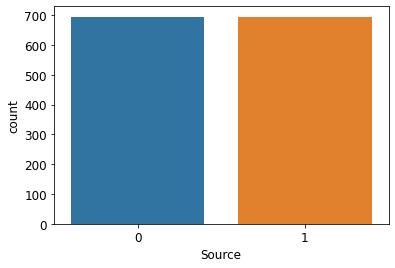

In [86]:
sns.countplot(data=dataset,x='Source')

convert the Content column in all lower case words

In [87]:
##Convert 'Content' column to lowercase
dataset_final['L_Content'] = dataset_final['Content'].str.lower()
dataset_final.head()

C:\Users\graduate\AppData\Local\Temp\ipykernel_18700\1164475232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final['Content'].str.lower()


,Title,Content,Source,L_Content
0,Silicon Valley Bank collapse concerns founders...,"The collapse of Silicon Valley Bank, a major f...",1,"the collapse of silicon valley bank, a major f..."
1,Mother of young boy who shot teacher arrested ...,"In a shocking turn of events, the mother of th...",1,"in a shocking turn of events, the mother of th..."
2,660-mile rescue flight highlights Alaska's uni...,"ANCHORAGE, Alaska (AP) — A recent rescue missi...",1,"anchorage, alaska (ap) — a recent rescue missi..."
3,"Suspect in leak probe talked about God, guns a...",WASHINGTON (AP) -- A former U.S. government em...,1,washington (ap) -- a former u.s. government em...
4,New Ram electric pickup can go up to 500 miles...,The Ram truck brand has been a dominant force ...,1,the ram truck brand has been a dominant force ...


Remove stpwords and punctuation from the content of our news combination

In [88]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuations=string.punctuation
dataset_final['L_Content'] = dataset_final.L_Content.apply(lambda x: ' '.join([word for word in x.split() 
                    if word not in (stop) and word[0] != '@' 
                    and word not in punctuations ]))
dataset_final.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\graduate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\graduate\AppData\Local\Temp\ipykernel_18700\183012934.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final.L_Content.apply(lambda x: ' '.join([word for word in x.split()


,Title,Content,Source,L_Content
0,Silicon Valley Bank collapse concerns founders...,"The collapse of Silicon Valley Bank, a major f...",1,"collapse silicon valley bank, major financial ..."
1,Mother of young boy who shot teacher arrested ...,"In a shocking turn of events, the mother of th...",1,"shocking turn events, mother young boy shot te..."
2,660-mile rescue flight highlights Alaska's uni...,"ANCHORAGE, Alaska (AP) — A recent rescue missi...",1,"anchorage, alaska (ap) — recent rescue mission..."
3,"Suspect in leak probe talked about God, guns a...",WASHINGTON (AP) -- A former U.S. government em...,1,washington (ap) -- former u.s. government empl...
4,New Ram electric pickup can go up to 500 miles...,The Ram truck brand has been a dominant force ...,1,ram truck brand dominant force american pickup...


Remove punctuations

In [89]:
dataset_final['L_Content'] = dataset_final['L_Content'].str.replace('[{}]'.format(string.punctuation), '')
dataset_final.head()

C:\Users\graduate\AppData\Local\Temp\ipykernel_18700\2819100359.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset_final['L_Content'] = dataset_final['L_Content'].str.replace('[{}]'.format(string.punctuation), '')
C:\Users\graduate\AppData\Local\Temp\ipykernel_18700\2819100359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final['L_Content'].str.replace('[{}]'.format(string.punctuation), '')


,Title,Content,Source,L_Content
0,Silicon Valley Bank collapse concerns founders...,"The collapse of Silicon Valley Bank, a major f...",1,collapse silicon valley bank major financial i...
1,Mother of young boy who shot teacher arrested ...,"In a shocking turn of events, the mother of th...",1,shocking turn events mother young boy shot tea...
2,660-mile rescue flight highlights Alaska's uni...,"ANCHORAGE, Alaska (AP) — A recent rescue missi...",1,anchorage alaska ap — recent rescue mission al...
3,"Suspect in leak probe talked about God, guns a...",WASHINGTON (AP) -- A former U.S. government em...,1,washington ap former us government employee a...
4,New Ram electric pickup can go up to 500 miles...,The Ram truck brand has been a dominant force ...,1,ram truck brand dominant force american pickup...


Tokenize the news content

In [90]:
# Load the NLTK tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\graduate\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokenizing and Stemming

In [91]:
from nltk.stem import PorterStemmer
# Create an instance of the PorterStemmer class
porter_stemmer = PorterStemmer()
# Replace null values with an empty string
dataset_final['L_Content'].fillna('', inplace=True)
# Tokenize the 'Content' column only for non-null values
dataset_final['L_Content'] = dataset_final['L_Content'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)


C:\Users\graduate\AppData\Local\Temp\ipykernel_18700\565116871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'].fillna('', inplace=True)
C:\Users\graduate\AppData\Local\Temp\ipykernel_18700\565116871.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final['L_Content'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)


In [92]:
# Define a function for stemming
def stem_words(tokens):
    return [porter_stemmer.stem(token) for token in tokens]

# Apply stemming to the 'Content' column
dataset_final['L_Content'] = dataset_final['L_Content'].apply(stem_words)

C:\Users\graduate\AppData\Local\Temp\ipykernel_18700\1520122374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final['L_Content'].apply(stem_words)


In [93]:
dataset_final

,Title,Content,Source,L_Content
0,Silicon Valley Bank collapse concerns founders...,"The collapse of Silicon Valley Bank, a major f...",1,"[collaps, silicon, valley, bank, major, financ..."
1,Mother of young boy who shot teacher arrested ...,"In a shocking turn of events, the mother of th...",1,"[shock, turn, event, mother, young, boy, shot,..."
2,660-mile rescue flight highlights Alaska's uni...,"ANCHORAGE, Alaska (AP) — A recent rescue missi...",1,"[anchorag, alaska, ap, —, recent, rescu, missi..."
3,"Suspect in leak probe talked about God, guns a...",WASHINGTON (AP) -- A former U.S. government em...,1,"[washington, ap, former, us, govern, employe, ..."
4,New Ram electric pickup can go up to 500 miles...,The Ram truck brand has been a dominant force ...,1,"[ram, truck, brand, domin, forc, american, pic..."
...,...,...,...,...
1383,"AOC, other pro-choicers want to ignore court r...","Alexandria Ocasio-Cortez, a heroine on the Lef...",0,"[alexandria, ocasiocortez, heroin, left, like,..."
1384,IMF trims global growth outlook as banking tur...,The International Monetary Fund on Tuesday cut...,0,"[intern, monetari, fund, tuesday, cut, global,..."
1385,Drake Bell is 'safe' after former Nickelodeon ...,"Former Nickelodeon actor Drake Bell, is no lon...",0,"[former, nickelodeon, actor, drake, bell, long..."
1386,Mark Wahlberg’s daughter hilariously impersona...,Mark Wahlberg isn’t the only member of his fam...,0,"[mark, wahlberg, isn, ’, t, member, famili, kn..."


## Naive Bayes Classification

#### Create a matrix with every unique word in it

In [94]:
# Concatenate the list of words into a single string
dataset_final['L_Content'] = dataset_final['L_Content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
# Convert the 'Content' column to lowercase
dataset_final['L_Content'] = dataset_final['L_Content'].str.lower()

C:\Users\graduate\AppData\Local\Temp\ipykernel_18700\2929424380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final['L_Content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
C:\Users\graduate\AppData\Local\Temp\ipykernel_18700\2929424380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['L_Content'] = dataset_final['L_Content'].str.lower()


In [95]:
cv = CountVectorizer(ngram_range=(1,1), min_df=10)
vectorized_content = cv.fit_transform(dataset_final['L_Content'])

In [96]:
# Split data into test and training dataset
X=vectorized_content
y=dataset_final['Source'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing
Gaussian NB: When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution
Multinominal NB: Multinomial Naïve Bayes algorithm is preferred to use on data that is multinomially distributed. It is one of the standard algorithms which is used in text categorization classification

In [97]:
# Fit data to a multinomial Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#display(y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
#print(p, r, f, s)
print('Precision for NB classifier=',p)
print('Recall for NB classifier=',r)
print('f-score for NB classifier=',f)
print('Support for NB classifier=',s)


Precision for NB classifier= [0.86363636 0.95967742]
Recall for NB classifier= [0.96376812 0.85      ]
f-score for NB classifier= [0.9109589  0.90151515]
Support for NB classifier= [138 140]


#### Classification Report

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       138
           1       0.96      0.85      0.90       140

    accuracy                           0.91       278
   macro avg       0.91      0.91      0.91       278
weighted avg       0.91      0.91      0.91       278



### Accuracy claculation

In [99]:
# Training set accuracy
from sklearn.metrics import accuracy_score
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Training-set accuracy score: 0.9486
Model accuracy score: 0.9065


### Check for overfitting and underfitting

In [100]:
#print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9486
Test set score: 0.9065


### Confusion matrix

Text(80.40000000000006, 0.5, 'Predicted')

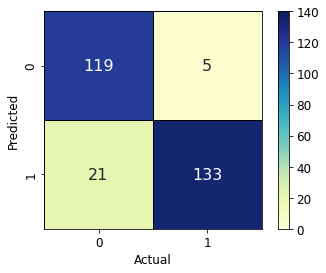

In [101]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
array = [[tp, fp],[fn, tn]]
sns.heatmap(array, annot=True, annot_kws={"size": 16}, fmt='d', cmap='YlGnBu', vmin=0, vmax=140, cbar=True, linewidths=0.5, linecolor='k', square=True)
sns.despine(left=False, right=False, top=False, bottom=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
# plt.savefig('1x1.png')

In [102]:
# Classification accuracy
classification_accuracy = (tp + tn) / float(tp + tn + fp + fn)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

#Classification error
classification_error = (fp + fn) / float(tp + tn + fp + fn)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.9065
Classification error : 0.0935


In [103]:
orig_article_sorted = clf.feature_log_prob_[0, :].argsort()[::-1]
ai_article_sorted = clf.feature_log_prob_[1, :].argsort()[::-1]
print('Orig article words:\n', np.take(cv.get_feature_names_out(), orig_article_sorted[:50]))
print('\nFake article words:\n', np.take(cv.get_feature_names_out(), ai_article_sorted[:50]))

Orig article words:
 ['said' 'year' 'also' 'peopl' 'one' 'new' 'it' 'state' 'say' 'time'
 'would' 'like' 'accord' 'report' 'get' 'use' 'polic' 'first' 'news'
 'last' 'day' 'offic' 'bank' 'includ' 'make' 'us' 'two' 'call' 'told'
 'work' 'the' 'could' 'go' 'offici' 'nation' 'health' 'fox' 'show' 'week'
 'may' 'shoot' 'famili' 'we' 'take' 'month' 'sinc' 'govern' 'that' 'mani'
 'court']

Fake article words:
 ['said' 'also' 'year' 'state' 'mani' 'new' 'need' 'howev' 'one' 'could'
 'continu' 'use' 'us' 'countri' 'includ' 'take' 'like' 'work' 'recent'
 'peopl' 'health' 'time' 'may' 'issu' 'concern' 'come' 'govern' 'make'
 'commun' 'provid' 'support' 'we' 'right' 'help' 'compani' 'it' 'face'
 'say' 'world' 'argu' 'would' 'protect' 'challeng' 'remain' 'report'
 'call' 'critic' 'signific' 'import' 'sever']


### ROC-AUC
ROC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels. The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels. In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

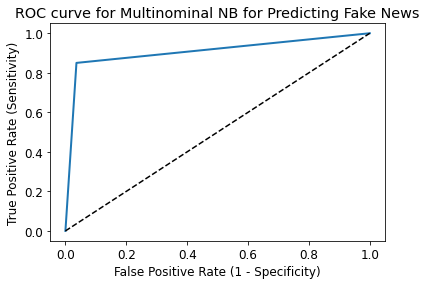

In [104]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label=1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Multinominal NB for Predicting Fake News')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve. ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

In [105]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9069


### k-Fold Cross Validation

In [106]:
# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.91891892 0.88288288 0.92792793 0.89189189 0.89189189 0.83783784
 0.84684685 0.84684685 0.88288288 0.88288288]
Average cross-validation score: 0.8811


# Try NB for different combination of words

### NB for single versus a pair of words  ngram_range=(1,2)

Precision for NB classifier= [0.87012987 0.96774194]
Recall for NB classifier= [0.97101449 0.85714286]
f-score for NB classifier= [0.91780822 0.90909091]
Support for NB classifier= [138 140]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       138
           1       0.97      0.86      0.91       140

    accuracy                           0.91       278
   macro avg       0.92      0.91      0.91       278
weighted avg       0.92      0.91      0.91       278

Training set score: 0.9712
Test set score: 0.9137
Classification accuracy : 0.9137
Classification error : 0.0863
Orig article words:
 ['said' 'year' 'also' 'peopl' 'one' 'new' 'it' 'state' 'say' 'time'
 'would' 'like' 'accord' 'report' 'get' 'use' 'polic' 'first' 'news'
 'last' 'day' 'offic' 'bank' 'includ' 'make' 'us' 'two' 'call' 'told'
 'work' 'the' 'go' 'could' 'offici' 'nation' 'health' 'fox' 'show' 'week'
 'may' 'shoot' 'famili' 'we' 'take' 'month' 'sinc' 'govern' 'that' 

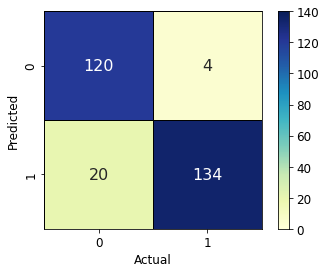

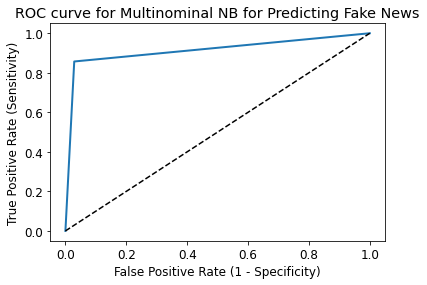

ROC AUC : 0.9141
Cross-validation scores:[0.92792793 0.91891892 0.93693694 0.91891892 0.93693694 0.85585586
 0.9009009  0.87387387 0.87387387 0.86486486]
Average cross-validation score: 0.9009


In [107]:
cv = CountVectorizer(ngram_range=(1,2), min_df=5)
vectorized_content = cv.fit_transform(dataset_final['L_Content'])

# Split data into test and training dataset
X1=vectorized_content
y1=dataset_final['Source'].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Fit data to a multinomial Naive Bayes model
clf1 = MultinomialNB()
clf1.fit(X1_train, y1_train)
y1_pred = clf1.predict(X1_test)
#display(y_pred)
p1,r1,f1,s1 = precision_recall_fscore_support(y1_test, y1_pred)
#print(p1, r1, f1, s1)
print('Precision for NB classifier=',p1)
print('Recall for NB classifier=',r1)
print('f-score for NB classifier=',f1)
print('Support for NB classifier=',s1)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

#check for overfitting or underfitting (training accuracy is greater than testing : undefitting and vice versa)
#print the scores on training and test set
print('Training set score: {:.4f}'.format(clf1.score(X1_train, y1_train)))
print('Test set score: {:.4f}'.format(clf1.score(X1_test, y1_test)))

#confusion matrix
tn1, fp1, fn1, tp1 = confusion_matrix(y1_test, y1_pred).ravel()
array = [[tp1, fp1],[fn1, tn1]]
sns.heatmap(array, annot=True, annot_kws={"size": 16}, fmt='d', cmap='YlGnBu', vmin=0, vmax=140, cbar=True, linewidths=0.5, linecolor='k', square=True)
sns.despine(left=False, right=False, top=False, bottom=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
# plt.savefig('1x1.png')

# Classification accuracy
classification_accuracy1 = (tp1 + tn1) / float(tp1 + tn1 + fp1 + fn1)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy1))

#Classification error
classification_error1 = (fp1 + fn1) / float(tp1 + tn1 + fp1 + fn1)
print('Classification error : {0:0.4f}'.format(classification_error1))


#print the most used words for both original and fake articles
orig_article_sorted1 = clf1.feature_log_prob_[0, :].argsort()[::-1]
ai_article_sorted1 = clf1.feature_log_prob_[1, :].argsort()[::-1]
print('Orig article words:\n', np.take(cv.get_feature_names_out(), orig_article_sorted1[:50]))
print('\nFake article words:\n', np.take(cv.get_feature_names_out(), ai_article_sorted1[:50]))

# plot ROC Curve
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds = roc_curve(y1_test,y1_pred,pos_label=1)
plt.figure(figsize=(6,4))
plt.plot(fpr1, tpr1, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Multinominal NB for Predicting Fake News')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC1 = roc_auc_score(y1_test, y1_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC1))

# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(clf1, X1_train, y1_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores1))

# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores1.mean()))


### NB for pair of words  ngram_range=(2,2)

Precision for NB classifier= [0.89655172 0.93984962]
Recall for NB classifier= [0.94202899 0.89285714]
f-score for NB classifier= [0.91872792 0.91575092]
Support for NB classifier= [138 140]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       138
           1       0.94      0.89      0.92       140

    accuracy                           0.92       278
   macro avg       0.92      0.92      0.92       278
weighted avg       0.92      0.92      0.92       278

Training set score: 0.9667
Test set score: 0.9173
Classification accuracy : 0.9173
Classification error : 0.0827
Orig article words:
 ['fox news' 'last year' 'new york' 'click get' 'get fox' 'news app'
 'told cnn' 'news digit' 'unit state' 'social media' 'last month'
 'associ press' 'said statement' 'polic depart' 'offici said' 'last week'
 'told fox' 'valentin day' 'we re' 'polic said' 'old nation' 'gun violenc'
 'nation bank' 'first time' 'polic offic' 'health care' 'year ago

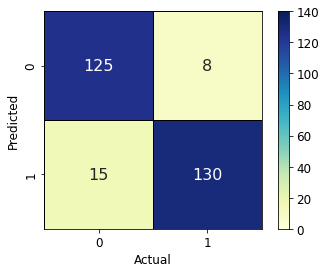

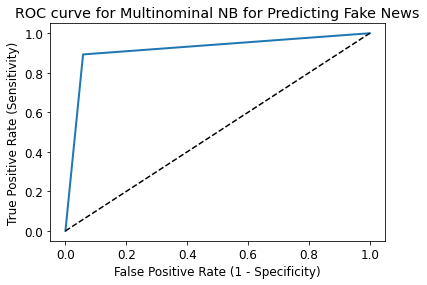

ROC AUC : 0.9174
Cross-validation scores:[0.93693694 0.91891892 0.90990991 0.90990991 0.89189189 0.85585586
 0.87387387 0.90990991 0.89189189 0.89189189]
Average cross-validation score: 0.8991


In [108]:
cv = CountVectorizer(ngram_range=(2,2), min_df=5)
vectorized_content = cv.fit_transform(dataset_final['L_Content'])

# Split data into test and training dataset
X2=vectorized_content
y2=dataset_final['Source'].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Fit data to a multinomial Naive Bayes model
clf2 = MultinomialNB()
clf2.fit(X2_train, y2_train)
y2_pred = clf2.predict(X2_test)
#display(y_pred)
p2,r2,f2,s2 = precision_recall_fscore_support(y2_test, y2_pred)
#print(p1, r1, f1, s1)
print('Precision for NB classifier=',p2)
print('Recall for NB classifier=',r2)
print('f-score for NB classifier=',f2)
print('Support for NB classifier=',s2)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y2_test, y2_pred))

#check for overfitting or underfitting (training accuracy is greater than testing : undefitting and vice versa)
#print the scores on training and test set
print('Training set score: {:.4f}'.format(clf2.score(X2_train, y2_train)))
print('Test set score: {:.4f}'.format(clf2.score(X2_test, y2_test)))

#confusion matrix
tn2, fp2, fn2, tp2 = confusion_matrix(y2_test, y2_pred).ravel()
array = [[tp2, fp2],[fn2, tn2]]
sns.heatmap(array, annot=True, annot_kws={"size": 16}, fmt='d', cmap='YlGnBu', vmin=0, vmax=140, cbar=True, linewidths=0.5, linecolor='k', square=True)
sns.despine(left=False, right=False, top=False, bottom=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
# plt.savefig('1x1.png')

# Classification accuracy
classification_accuracy2 = (tp2 + tn2) / float(tp2 + tn2 + fp2 + fn2)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy2))

#Classification error
classification_error2 = (fp2 + fn2) / float(tp2 + tn2 + fp2 + fn2)
print('Classification error : {0:0.4f}'.format(classification_error2))


#print the most used words for both original and fake articles
orig_article_sorted2 = clf2.feature_log_prob_[0, :].argsort()[::-1]
ai_article_sorted2 = clf2.feature_log_prob_[1, :].argsort()[::-1]
print('Orig article words:\n', np.take(cv.get_feature_names_out(), orig_article_sorted2[:50]))
print('\nFake article words:\n', np.take(cv.get_feature_names_out(), ai_article_sorted2[:50]))

# plot ROC Curve
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds = roc_curve(y2_test,y2_pred,pos_label=1)
plt.figure(figsize=(6,4))
plt.plot(fpr2, tpr2, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Multinominal NB for Predicting Fake News')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC2 = roc_auc_score(y2_test, y2_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC2))

# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(clf2, X2_train, y2_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores2))

# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores2.mean()))